# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

### <font color='brown'>워드클라우드 : 문재인대통령 2021년 신년사</font>
>    
> - 청와대 : https://www1.president.go.kr/articles/9771 
> - 과제1. 문재인대통령 연설문을 크롤링 
> - 과제2. 의미없는 글자는 필터링 후 워드클라우드 생성

In [1]:
# https://www1.president.go.kr/articles/10191

In [2]:
# from images import bigpycraft_bda as bpc
from IPython.display import Image 

In [3]:
from konlpy.tag import Hannanum
from lxml import html
from collections import Counter
from urllib.request import urlopen

import sys
import random
import webbrowser
import pytagcloud 

pygame 2.0.1 (SDL 2.0.14, Python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
rndno = lambda: random.randint(0, 255)
color = lambda: (rndno(), rndno(), rndno())

In [5]:
color()

(172, 170, 66)

In [6]:
def get_tags(text, ntags=50, multiplier=10):
    hannanum = Hannanum()
    nouns = hannanum.nouns(text)
    count = Counter(nouns)
    return [
        {'color' : color(),
         'tag' : n,
         'size' : c*multiplier,
        }
        for n, c in count.most_common(ntags)
    ]


In [7]:
def draw_cloud(tags, filename, fontname='Korean', size=(800, 600)):
    pytagcloud.create_tag_image(tags, filename, fontname=fontname, size=size)
    # webbrowser.open(filename)

In [8]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [9]:
url = 'https://www1.president.go.kr/articles/9771'      # 2021년
html = urlopen(url)
soup = BeautifulSoup(html, 'lxml')

In [10]:
print(str(soup)[:1000])

<!DOCTYPE html>
<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge, chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0" name="viewport"/>
<meta content="#082e59" name="theme-color"/>
<meta content="나라를 나라답게, 국민과 함께 갑니다." name="description"/>
<meta content="청와대, 대통령비서실, 대통령, 한국, 대한민국, 대한민국 정부, president.go.kr, 靑瓦臺, 19대, 문재인" name="keywords"/>
<meta content="청와대 (CHEONGWADAE)" name="author"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="website" property="og:type"/>
<meta content="2021년 신년사 &gt;  대한민국 청와대" property="og:title"/>
<meta content="https://www1.president.go.kr/articles/9771" property="og:url"/>
<meta content="대한민국 청와대" property="og:site_name"/>
<meta content="나라를 나라답게, 국민과 함께 갑니다." property="og:description"/>
<meta content="https://www1.president.go.kr/storage/thumbnail/2021/01/HHUAMYUEND161033812533228.jpg" property="og:image"/>
<meta content="https://www

In [11]:
# <div class="text left cb text_wrap motion fadeIn visible" data-animation="fadeIn">
# speech = soup.find('div', 'text left cb text_wrap motion fadeIn visible')
# speech = soup.find_all('div', 'cs_body')
speech = soup.find('div', 'cs_body')
speech

<div class="cs_body">
<div class="cs_view cs_v1 wrap text left">
<div class="cs_viewhead">
<h3 class="title bold cb motion" data-animation="fadeInDown">2021년 신년사</h3>
<span class="ci cs_date motion" data-animation="fadeIn">2021-01-11</span>
</div>
<div class="video_wrap">
<iframe allowfullscreen="" class="video" frameborder="0" src="https://www.youtube.com/embed/QSKu8La9-U4?rel=0" title="동영상 재생 영역"></iframe>
</div>
<div class="text left cb text_wrap motion" data-animation="fadeIn">
<div style="text-align:center"> </div>
<div><span style="background-color:#ffffff; display:inline !important; font-size:15px">존경하는 국민 여러분,</span></div>
<br/>
신축년 새해를 맞았습니다.<br/>
희망을 기원하면서도 마음이 무겁습니다. <br/>
새해가 새해 같지 않다는 말이 실감납니다.<br/>
<br/>
코로나와의 기나긴 전쟁이 끝나지 않았습니다.<br/>
생명과 안전이 여전히 위협받고, 유례없는 민생경제의 어려움이 지속되고 있습니다. <br/>
일상의 상실로 겪는 아픔도 계속되고 있습니다.<br/>
고난의 시기를 건너고 계신 국민들께 깊은 위로의 말씀을 드립니다.<br/>
그러나 새해는 분명히 다른 해가 될 것입니다. <br/>
우리는 함께 코로나를 이겨낼 것입니다. <br/>
2021년은 우리 국민에게 ‘회복의 해’, ‘포용의 해’, ‘도약의 해’가 될 것입니다.<br/>
<br

In [12]:
speech_txt = speech.get_text()
speech_txt[:1000]

'\n\n\n2021년 신년사\n2021-01-11\n\n\n\n\n\n\xa0\n존경하는 국민 여러분,\n\r\n신축년 새해를 맞았습니다.\r\n희망을 기원하면서도 마음이 무겁습니다.\xa0\r\n새해가 새해 같지 않다는 말이 실감납니다.\n\r\n코로나와의 기나긴 전쟁이 끝나지 않았습니다.\r\n생명과 안전이 여전히 위협받고, 유례없는 민생경제의 어려움이 지속되고 있습니다.\xa0\r\n일상의 상실로 겪는 아픔도 계속되고 있습니다.\r\n고난의 시기를 건너고 계신 국민들께 깊은 위로의 말씀을 드립니다.\r\n그러나 새해는 분명히 다른 해가 될 것입니다.\xa0\r\n우리는 함께 코로나를 이겨낼 것입니다.\xa0\r\n2021년은 우리 국민에게 ‘회복의 해’, ‘포용의 해’, ‘도약의 해’가 될 것입니다.\n\n\r\n국민 여러분,\n\r\n2020년, 신종감염병이 인류의 생명을 위협했고, 일상은 송두리째 바뀌었습니다.\r\n우리 또한 예외가 아니었습니다.\r\n세계 경제도 대공황 이후 최악의 침체를 겪었습니다.\r\n우리 경제 역시 마이너스 성장을 면치 못했습니다.\r\n모두가 어렵고 힘들었습니다.\r\n국민들은 일 년 내내 불편을 감수해야 했습니다.\r\n그러나 우리는 꺾이지 않았습니다.\xa0\r\n위기 속에서 대한민국은 오히려 빛났습니다.\xa0\r\n의료진들은 헌신적으로 환자를 돌봤고 국민들은 스스로 방역의 주체가 되었습니다.\xa0\r\n우리 국민들은 이웃의 안전이 곧 나의 안전이라는 지극히 평범한 진실을, 놀라운 실천으로 전 세계에 보여주었습니다.\r\n국민들이 자발적으로 구상한 창의적인 방역 조치들은 신속하게 현장에 적용되었습니다.\r\n한국의 진단키트와 ‘드라이브 스루’ 검사방법과 마스크 같은 방역 물품들은 세계 각국에 보급되어, 인류를 코로나로부터 지키는데 크게 기여했습니다.\r\n‘K-방역’은 국민 한 사람 한 사람의 헌신과 희생 위에 세워진 것입니다.\r\n세계 최초로 전국 단위 선거와 입시를 치러냈고. 봉쇄 없이 확산을 최대한 억제하며

In [13]:
speech_txt = speech_txt.replace('\r', ' ')
speech_txt = speech_txt.replace('\n', ' ')
speech_txt = speech_txt.replace('\xa0', ' ')
speech_txt

'   2021년 신년사 2021-01-11        존경하는 국민 여러분,   신축년 새해를 맞았습니다.  희망을 기원하면서도 마음이 무겁습니다.   새해가 새해 같지 않다는 말이 실감납니다.   코로나와의 기나긴 전쟁이 끝나지 않았습니다.  생명과 안전이 여전히 위협받고, 유례없는 민생경제의 어려움이 지속되고 있습니다.   일상의 상실로 겪는 아픔도 계속되고 있습니다.  고난의 시기를 건너고 계신 국민들께 깊은 위로의 말씀을 드립니다.  그러나 새해는 분명히 다른 해가 될 것입니다.   우리는 함께 코로나를 이겨낼 것입니다.   2021년은 우리 국민에게 ‘회복의 해’, ‘포용의 해’, ‘도약의 해’가 될 것입니다.    국민 여러분,   2020년, 신종감염병이 인류의 생명을 위협했고, 일상은 송두리째 바뀌었습니다.  우리 또한 예외가 아니었습니다.  세계 경제도 대공황 이후 최악의 침체를 겪었습니다.  우리 경제 역시 마이너스 성장을 면치 못했습니다.  모두가 어렵고 힘들었습니다.  국민들은 일 년 내내 불편을 감수해야 했습니다.  그러나 우리는 꺾이지 않았습니다.   위기 속에서 대한민국은 오히려 빛났습니다.   의료진들은 헌신적으로 환자를 돌봤고 국민들은 스스로 방역의 주체가 되었습니다.   우리 국민들은 이웃의 안전이 곧 나의 안전이라는 지극히 평범한 진실을, 놀라운 실천으로 전 세계에 보여주었습니다.  국민들이 자발적으로 구상한 창의적인 방역 조치들은 신속하게 현장에 적용되었습니다.  한국의 진단키트와 ‘드라이브 스루’ 검사방법과 마스크 같은 방역 물품들은 세계 각국에 보급되어, 인류를 코로나로부터 지키는데 크게 기여했습니다.  ‘K-방역’은 국민 한 사람 한 사람의 헌신과 희생 위에 세워진 것입니다.  세계 최초로 전국 단위 선거와 입시를 치러냈고. 봉쇄 없이 확산을 최대한 억제하며, OECD 국가 중에서도 손꼽히는 방역 모범국가가 된 것은, 우리 국민들이 만들어 낸, 누구도 깎아내릴 수 없는 소중한 성과입니다.   우리 국민들의 상생 정신

In [14]:
speech_tags = get_tags(speech_txt)
speech_tags

[{'color': (104, 120, 87), 'tag': '우리', 'size': 430},
 {'color': (84, 34, 152), 'tag': '것', 'size': 390},
 {'color': (189, 6, 52), 'tag': '수', 'size': 330},
 {'color': (175, 174, 129), 'tag': '경제', 'size': 190},
 {'color': (191, 235, 45), 'tag': '국민', 'size': 170},
 {'color': (70, 188, 54), 'tag': '국민들', 'size': 140},
 {'color': (188, 171, 194), 'tag': '전', 'size': 130},
 {'color': (215, 38, 57), 'tag': '위', 'size': 120},
 {'color': (131, 86, 241), 'tag': '지난해', 'size': 120},
 {'color': (108, 112, 94), 'tag': '회복', 'size': 120},
 {'color': (132, 103, 46), 'tag': '세계', 'size': 110},
 {'color': (197, 67, 219), 'tag': '코', 'size': 100},
 {'color': (200, 113, 26), 'tag': '정부', 'size': 100},
 {'color': (9, 21, 137), 'tag': '협력', 'size': 100},
 {'color': (215, 9, 41), 'tag': '들', 'size': 90},
 {'color': (59, 123, 107), 'tag': '등', 'size': 90},
 {'color': (212, 112, 95), 'tag': '뉴딜’', 'size': 90},
 {'color': (115, 107, 164), 'tag': '일상', 'size': 80},
 {'color': (72, 125, 229), 'tag': '대한민국', 

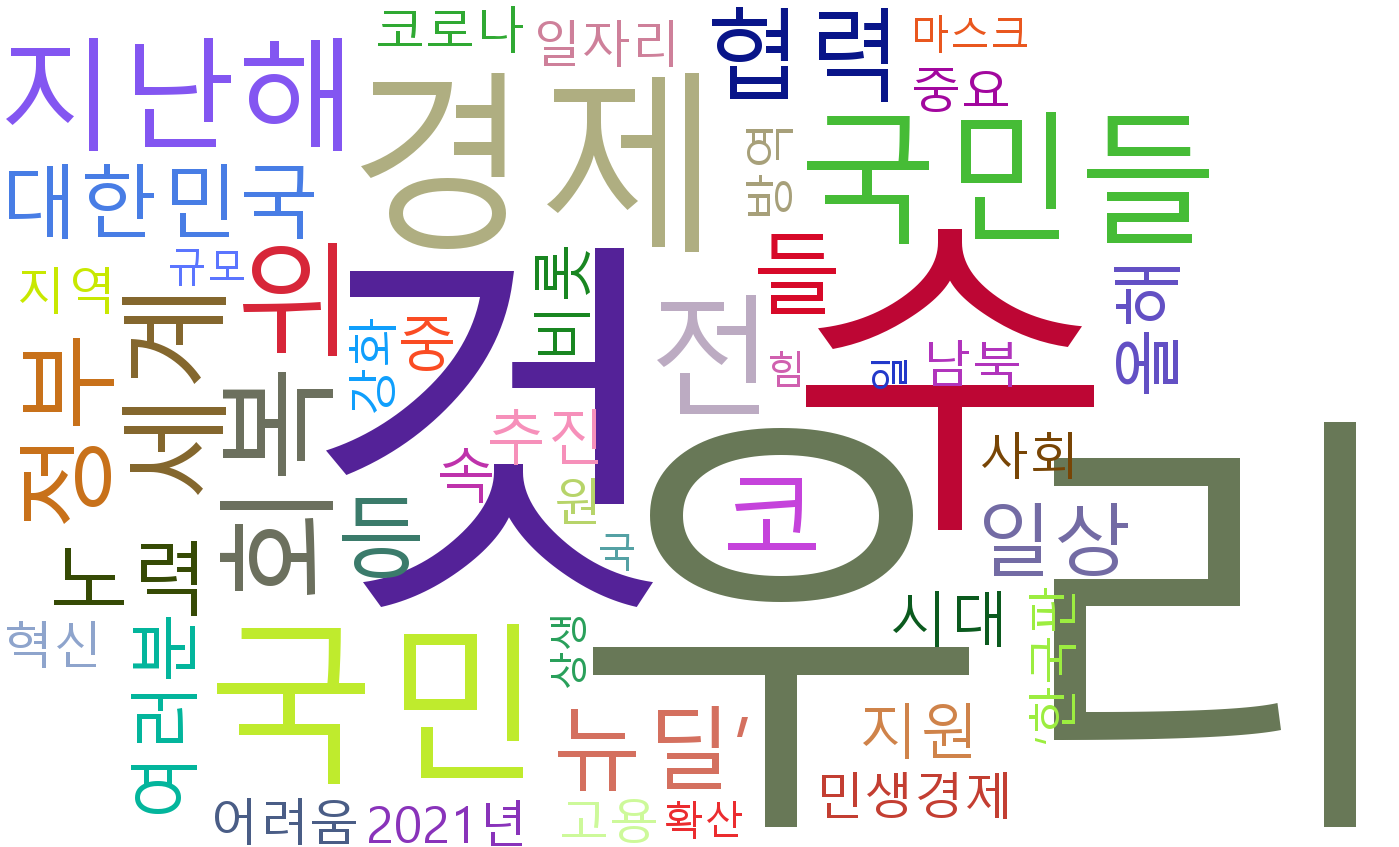

In [15]:
img_wordcloud = 'wordcloud/moon_speech_2021.png'
draw_cloud(speech_tags, img_wordcloud, fontname='Korean', size=(1400, 1000))
Image(img_wordcloud)

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>